## Logistic Regression - User Data

Logistic regression is an example of supervised learning. 

It is used to calculate or predict the probability of a binary (yes/no) event occurring. 

An example of logistic regression could be applying machine learning to determine if a person is likely to be infected with COVID-19 or not. 

Since we have two possible outcomes to this question - yes they are infected, or no they are not infected -  this is called binary classification.

In linear regression, the outcome is continuous and can be any possible value. However in the case of logistic regression, the predicted outcome is discrete and restricted to a limited number of values.

For example, say we are trying to apply machine learning to the sale of a house. If we are trying to predict the sale price based on the size, year built, and number of stories we would use linear regression, as linear regression can predict a sale price of any possible value. If we are using those same factors to predict if the house sells or not, we would logistic regression as the possible outcomes here are restricted to yes or no.

Hence, linear regression is an example of a regression model and logistic regression is an example of a classification model.

In [32]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# This dataset contains information about users from a company’s database. 
# It contains information about UserID, Gender, Age, EstimatedSalary, and Purchased. 
# We are using this dataset for predicting whether a user will purchase the company’s newly launched product or not.

In [34]:
#import the dataset and read its first five elements.

df = pd.read_csv('user_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
#to find no of rows and columns
df.shape

(400, 5)

In [36]:
#getting certain information about the columns in dataset like non-null count and datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [37]:
#description of the data in a column in the DataFrame like average, count etc.
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [38]:
#to check if there are any missing values in the dataset.
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<AxesSubplot:>

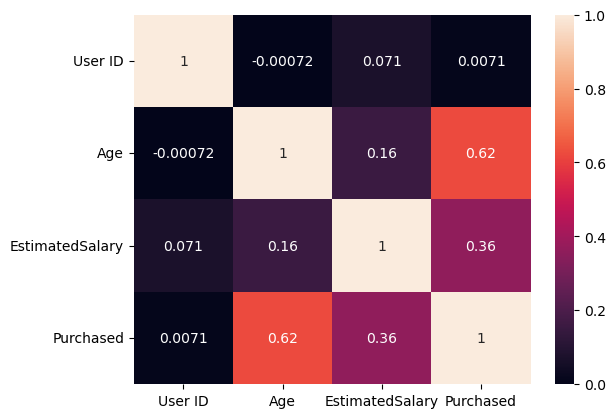

In [39]:
#correlation matrix - a table which displays the correlation coefficients for different variables/columns
# correlation factor close to 1 means highly corelated (very similar)
# correlation factor close to 0 means not very corelated (very different)
sns.heatmap(df.corr(),annot=True)

### Logistic Regression (Classification)

##### STEP 1} Create X and Y data 

In [40]:
# x -- contains features to train on.
# Y -- contains attribute/variable/column we are going to predict.

In [46]:
#checking column names of data set
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [47]:
x = df[['User ID', 'Age', 'EstimatedSalary']]
y = df['Purchased']

##### STEP 2} Split data into training and testing model 

In [48]:
#Scikit learn
#Import model: from sklearn.family import Model
from sklearn.model_selection import train_test_split

In [49]:
#performing train test split - 40% test and 60% training dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101) #40% test data and random_state of everyone who puts 101 will be same.

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

##### STEP 3} Creating and Training Model

In [54]:
#Scikit learn
#Import model: from sklearn.family import Model
from sklearn.linear_model import LogisticRegression

In [55]:
#create instance
classifier = LogisticRegression(random_state = 0)

In [56]:
#train model on training data
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

##### STEP 4} Making Predictions.

In [58]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1]


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[71  9]
 [13 27]]


In [61]:
#actual values
print(y_test)

38     0
387    0
270    0
181    0
195    0
      ..
228    0
178    0
267    0
147    0
230    1
Name: Purchased, Length: 120, dtype: int64


##### STEP 6} Performance Evaluation

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [66]:
print("accuracy: ",accuracy_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))

accuracy:  0.8166666666666667
f1 score:  0.7105263157894738
precision:  0.75
recall:  0.675
